# Script that perform modelling using different models

### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict

## Data Preparation

Uploading the matrix

In [3]:
sparse_matrix = pd.read_csv('matrix.csv')

In [4]:
sparse_matrix.head()

,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,doc2vec_9,...,doc2vec_191,doc2vec_192,doc2vec_193,doc2vec_194,doc2vec_195,doc2vec_196,doc2vec_197,doc2vec_198,doc2vec_199,Sentiment
0,-0.002338,0.000781,0.002124,0.000501,-0.000917,0.000252,-0.002151,-0.000951,0.000241,-0.002489,...,0.000519,-0.000015,-0.000744,0.001976,0.000762,0.001587,-0.002278,0.000783,0.002247,Negative
1,0.001938,0.001311,0.000320,-0.001054,-0.002408,0.000491,0.000218,0.000161,0.002049,-0.000929,...,-0.001227,-0.000746,0.001840,-0.000436,-0.000996,-0.001008,0.002176,-0.000882,0.000176,Positive
2,-0.000408,0.002408,-0.000499,-0.001589,0.000695,-0.001969,0.000433,0.000508,0.001173,-0.001201,...,0.000883,-0.002468,-0.002339,0.000374,0.001733,0.001598,-0.002239,-0.000264,0.000285,Positive
3,0.000473,0.000037,-0.002223,-0.000940,-0.001398,0.002042,0.000230,0.000627,0.001285,-0.000254,...,-0.000858,-0.001257,-0.000725,-0.002463,-0.002341,0.002111,0.001643,-0.001026,-0.000480,Positive
4,-0.000326,0.002261,0.001525,-0.001657,-0.000361,-0.002382,-0.001542,-0.001674,-0.001292,0.002034,...,-0.001903,-0.002152,0.002247,0.001016,-0.002131,0.000059,-0.000368,0.001198,-0.001351,Positive


Since predicting a label is not possible we need to encode the target

In [5]:
sparse_matrix['Sentiment_Encoded'] = LabelEncoder().fit_transform(sparse_matrix['Sentiment'])

In [6]:
sparse_matrix['Sentiment_Encoded'].value_counts() # 2 - positive 1 - neutral 0 - negative

Sentiment_Encoded
2    81
0    11
1     8
Name: count, dtype: int64

In [7]:
sparse_matrix.drop(['Sentiment'], axis=1, inplace=True)

Splitting into train and test

In [8]:
X = sparse_matrix.iloc[:,0:-2]
Y = sparse_matrix.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Since, as we saw a block above, the target variable is really unbalanced, we need a method to try at lest to reduce the level of unbalancesness.

**SMOTE**, or Synthetic Minority Over-sampling Technique, is a resampling method designed to address imbalances in class distribution within a dataset, commonly encountered in machine learning applications. It specifically targets the minority class by generating synthetic instances that lie along the line segments connecting existing minority class samples. By introducing synthetic data points, SMOTE helps to balance the class distribution, preventing the model from being biased towards the majority class. This technique is particularly useful when dealing with imbalanced datasets, enhancing the model's ability to recognize patterns and make more accurate predictions for minority class instances.

In [9]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

/Users/riccardo/opt/anaconda3/envs/python_3112/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [10]:
print(y_train_res.value_counts())

Sentiment_Encoded
0    65
2    65
1    65
Name: count, dtype: int64


## Models

Since I want to predict a class, I need to use classification models. The one I will show in this notebook are:
- Näive Bayes
- Decision Tree
- Random Forest
- Logistic Regression

### Näive Bayes

In [11]:
# Naive Bayes
nb = GaussianNB()
                                                    
nb.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred, average='micro')
f1_score_nb = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", accuracy_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_score_nb)

Accuracy: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


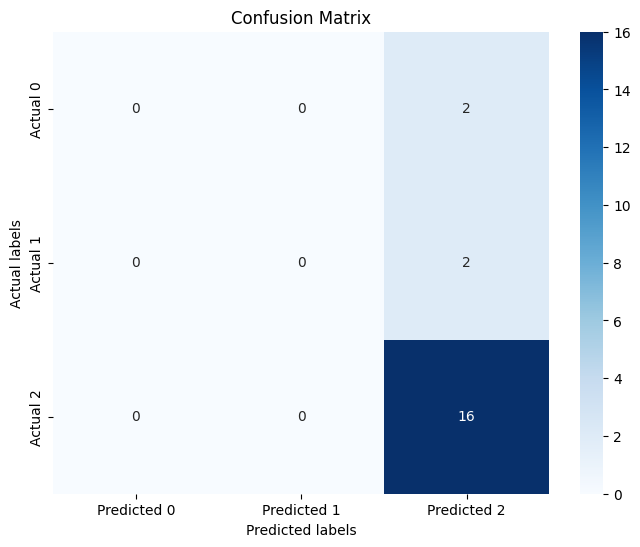

In [12]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [13]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='best')

# Train the classifier
dt.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_dt = accuracy_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred, average='micro')
f1_score_dt = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_score_dt)

Accuracy: 0.6
Recall: 0.6
F1 Score: 0.6


### Random Forest

Before implementing a Random Forest I thought It could be useful to check how many trees are the best choice to construct the Forest. In the code above I created a list of tuples containing "RandomForest Classifiers" string and as second element a tuple with the number of trees used and the OOB rate. Setting the attribute oob_score=True I can track every time the OOB score that is the probability of predicting the Out Of Bag samples correctly. The last part of the code plot a line chart where on the x axes there is the number of trees (from 50 to 500 with a step of 10) and the y axes the OOB rate.

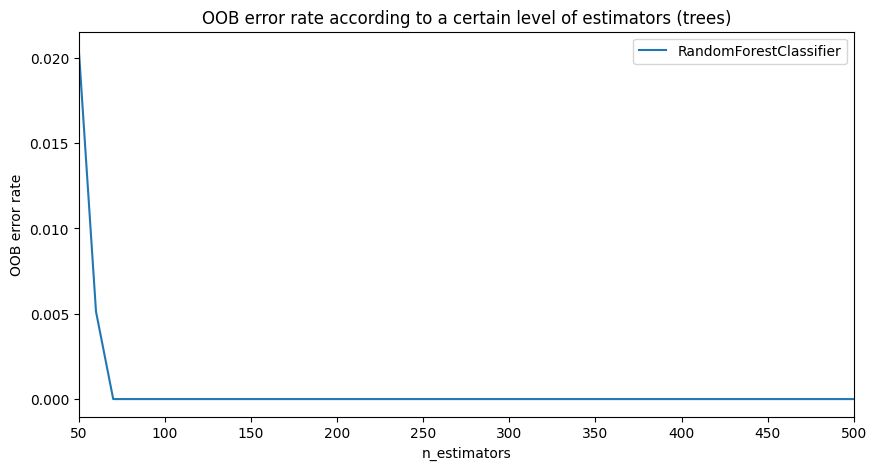

In [14]:
ensemble_rf = [
    ("RandomForestClassifier", RandomForestClassifier(warm_start=True, oob_score=True, random_state=42))
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_rf)


min_estimators = 50
max_estimators = 500

for label, rf in ensemble_rf:
    for i in range(min_estimators, max_estimators + 1, 10):
        rf.set_params(n_estimators=i, random_state = 42)
        rf.fit(X_train_res, y_train_res)
        oob_error = 1 - rf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err) # unzip the tuple with number of trees and OOB error
    plt.figure(figsize=(10,5))
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title('OOB error rate according to a certain level of estimators (trees)')
plt.legend(loc="upper right")
plt.show()

After done that I applied some hyperparameter tuning in order to visualize which are the best parameter to obtain the highest accuracy, given the fact that the Random Forest has many parameter to set:

In [15]:
params = {'n_estimators' : [60, 100, 150],
          'criterion' : ['gini', 'entropy'],
          'max_depth' : [None, 4, 10, 15],
          'max_features' : ['sqrt', 'log2', None],
          'bootstrap' : [True, False]}

hyperparameter_tuning = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=3, n_jobs=-1)

hyp_res = hyperparameter_tuning.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [16]:
hyp_res.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=60, criterion='gini', random_state=42, bootstrap=True, max_depth=None, max_features='sqrt')

# Train the classifier
rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred, average='micro')
f1_score_rf = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)

Accuracy: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


### Logistic Regression

In [18]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred, average='micro')
f1_score_lr = f1_score(y_test, y_pred, average='micro')
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_score_lr)

Accuracy: 0.75
Recall: 0.75
F1 Score: 0.75


### Storing results

In [20]:
results = pd.DataFrame({'Model Name' : ['Naive Bayes' ,'Decision Tree', 'Random Forest', 'Logistic Regression'], 
                                'Accuracy' : [accuracy_nb , accuracy_dt, accuracy_rf, accuracy_lr],
                                'Recall' : [recall_nb, recall_dt, recall_rf, recall_lr],
                                'F1 Score' : [f1_score_nb, f1_score_dt, f1_score_rf, f1_score_lr]})

In [21]:
results

,Model Name,Accuracy,Recall,F1 Score
0,Naive Bayes,0.80,0.80,0.80
1,Decision Tree,0.60,0.60,0.60
2,Random Forest,0.80,0.80,0.80
3,Logistic Regression,0.75,0.75,0.75
